In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [3]:
def generate_data(directory):
    data = ImageDataGenerator(rescale = 1./255.)
    generator = data.flow_from_directory(
        directory, batch_size = 64, 
        shuffle = True, seed = 42,
        class_mode = 'binary', target_size = (224, 224),
        classes = {'NORMAL': 0, 'PNEUMONIA': 1} )
    
    return generator

In [4]:
train_generator = generate_data('XRAY_DATASET/train')
test_generator = generate_data('XRAY_DATASET/test')
validation_generator = generate_data('XRAY_DATASET/val')
total_images_label = np.concatenate([train_generator.labels, test_generator.labels, validation_generator.labels])

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [5]:
print(len(test_generator.labels), test_generator.labels)
print("\n")
print(len(train_generator.labels), train_generator.labels)
print("\n")
print(len(validation_generator.labels), validation_generator.labels)
print("\n")
print(len(total_images_label), total_images_label)

624 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 

In [14]:
print( {'Normal_cases': len(np.where(total_images_label == 0)[0]),
      'Pneumonia_cases': len(np.where(total_images_label == 1)[0])})

{'Normal_cases': 1583, 'Pneumonia_cases': 4273}


In [6]:
print(train_generator)

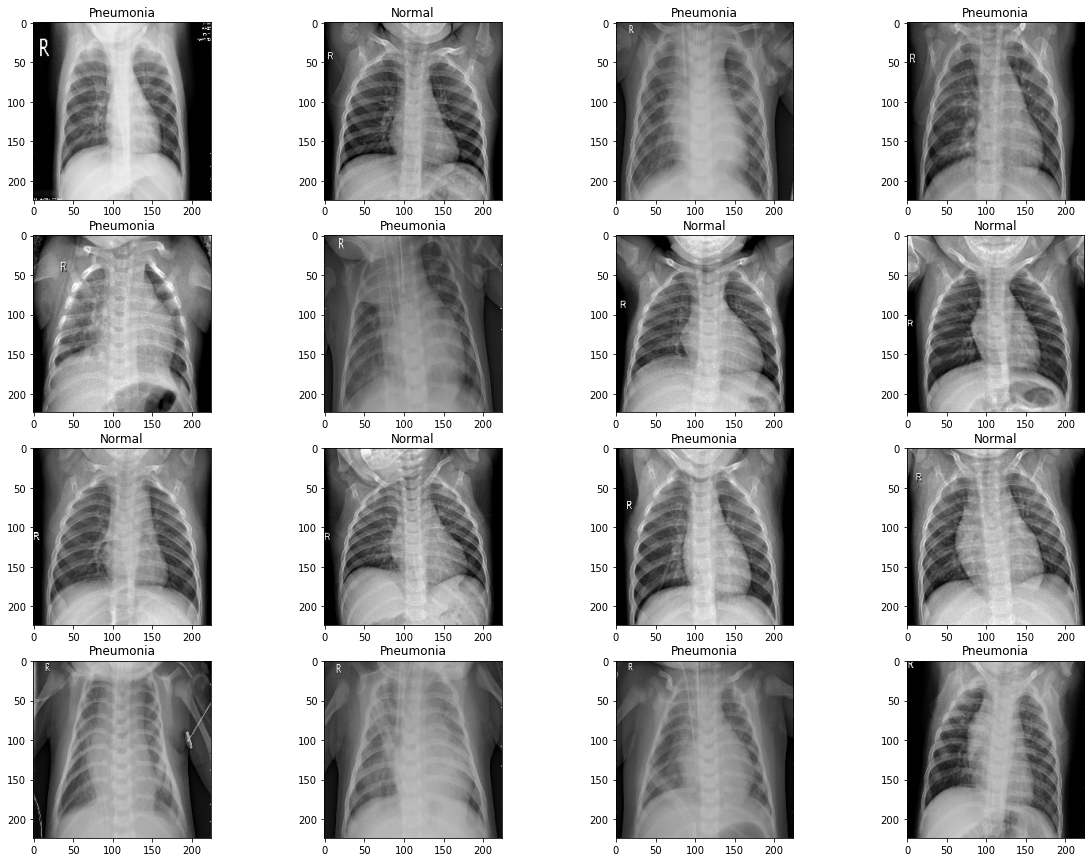

In [15]:
import math
def display_image(generator, no_of_images):
    img_feature = generator[0][0][ : no_of_images]
    img_label = generator[0][1][ : no_of_images]

    plt.figure(figsize = (20, 15))
    for i in range(no_of_images):
        plt.subplot(math.ceil(no_of_images/4), 4, i+1)
        plt.imshow(img_feature[i])
        if(img_label[i] == 0):
            plt.title("Normal")
        if(img_label[i] == 1):
            plt.title("Pneumonia")
                    
display_image(train_generator, 16)

In [19]:
# Set random seed
tf.random.set_seed(42)

# Build model using Sequential API
My_model_trail6 = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32, [3,3], input_shape = [224, 224, 3], strides = [1,1], padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    
    tf.keras.layers.Conv2D(64, [3,3], strides = [1, 1] ,padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    
    tf.keras.layers.Conv2D(128, [3,3], strides = [1, 1], padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    
    tf.keras.layers.Conv2D(256, [3,3], strides = [1, 1], padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D(pool_size = (2,2)),
    
    tf.keras.layers.AveragePooling2D(pool_size = (2, 2)),
    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'sigmoid')
])

# Compile the Built model 
My_model_trail6.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, 
                        optimizer = tf.keras.optimizers.Adam(), metrics = ["sparse_categorical_accuracy"])


In [20]:
# Fit the model
report2 = My_model_trail6.fit(train_generator, validation_data = validation_generator, epochs = 10)

Epoch 1/10
82/82 [==============================] - 228s 3s/step - loss: 0.3097 - sparse_categorical_accuracy: 0.8593 - val_loss: 0.5640 - val_sparse_categorical_accuracy: 0.8125
Epoch 2/10
82/82 [==============================] - 246s 3s/step - loss: 0.1095 - sparse_categorical_accuracy: 0.9590 - val_loss: 0.2722 - val_sparse_categorical_accuracy: 0.8125
Epoch 3/10
82/82 [==============================] - 228s 3s/step - loss: 0.0863 - sparse_categorical_accuracy: 0.9676 - val_loss: 0.3023 - val_sparse_categorical_accuracy: 0.8125
Epoch 4/10
82/82 [==============================] - 321s 4s/step - loss: 0.0811 - sparse_categorical_accuracy: 0.9701 - val_loss: 1.3742 - val_sparse_categorical_accuracy: 0.6250
Epoch 5/10
82/82 [==============================] - 352s 4s/step - loss: 0.0773 - sparse_categorical_accuracy: 0.9730 - val_loss: 0.1970 - val_sparse_categorical_accuracy: 0.8750
Epoch 6/10
82/82 [==============================] - 241s 3s/step - loss: 0.0574 - sparse_categorical_accu

In [21]:
My_model_trail6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 128)     

<AxesSubplot:>

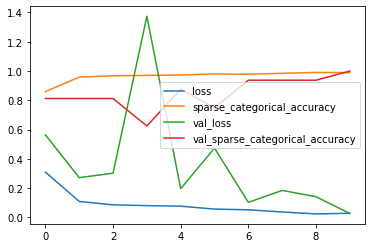

In [22]:
pd.DataFrame(report2.history).plot()

In [24]:
train_result = My_model_trail6.evaluate(train_generator)
test_result = My_model_trail6.evaluate(test_generator)
print("\n", train_result)
print("\n", test_result)

10/10 [==============================] - 9s 858ms/step - loss: 1.1198 - sparse_categorical_accuracy: 0.8141

 [0.03796942159533501, 0.9837039709091187]

 [1.119805932044983, 0.8141025900840759]


In [26]:
y_test = np.array([])
x_test = []

for i in range(math.ceil(len(test_generator.classes)/ 64)):
    x_test.append(test_generator[i][0]) 
    y_test = np.concatenate((y_test, test_generator[i][-1])) 
    
x_test = np.concatenate(x_test, axis = 0)
y_pred_val_t = My_model_trail6.predict(x_test)
y_pred_t = np.argmax(y_pred_val_t, axis = 1)

20/20 [==============================] - 7s 354ms/step


              precision    recall  f1-score   support

         0.0       0.95      0.53      0.68       234
         1.0       0.78      0.98      0.87       390

    accuracy                           0.81       624
   macro avg       0.87      0.76      0.78       624
weighted avg       0.84      0.81      0.80       624



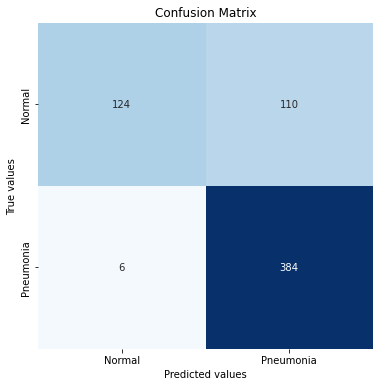

In [28]:
import seaborn as sns
plt.figure(figsize = (6, 6))
plt.title("Confusion Matrix")
hm1 = sns.heatmap(confusion_matrix(y_test, y_pred_t), annot = True, vmin = 0, fmt = 'g', cmap = 'Blues', cbar = False,
        xticklabels = ['Normal', 'Pneumonia'], yticklabels = ['Normal', 'Pneumonia'])  
hm1.set(xlabel = 'Predicted values')
hm1.set(ylabel = 'True values')
print(classification_report(y_test, y_pred_t))

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Model Recall: {:.2f}".format(recall))
print("Model Precision: {:.2f}".format(precision))
print("\n")
print("Accuracy on Training set {:.2f}".format(train_result[1]))
print("Accuracy on Testing set {:.2f}".format(test_result[1]))

Model Recall: 0.98
Model Precision: 0.78


Accuracy on Training set 0.98
Accuracy on Testing set 0.81
